1. Show image
2. Scale it up twice using bilinear interpolation & bivariate polynomial interpolation formula

[]

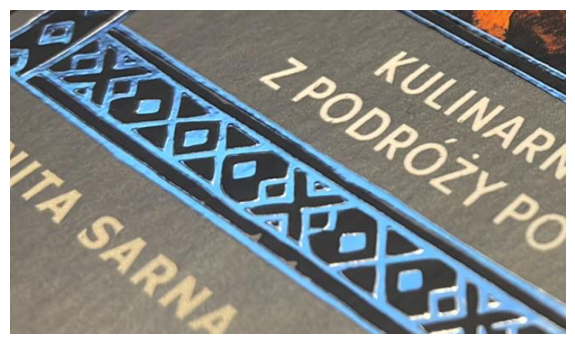

In [82]:
%matplotlib inline
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte

img_width, img_height = image.shape[1], image.shape[0]
image = io.imread('images/book_scaling.png')
plt.figure(figsize=(img_width / 100, img_height / 100), dpi=100)
plt.imshow(image)
plt.axis('off')
plt.plot()

In [112]:
print(f'image type : {type(image)}')
print(f'most inner element type: {image.dtype}')
print(f'image shape: {image.shape}')
print(f'first element shape: {image[0, 0].shape}, [{type(image[0, 0, 0])}, {type(image[0, 0, 1])}, {type(image[0, 0, 2])}, {type(image[0, 0, 3])}]')
print(f'first element type: {type(image[0, 0])}')
print(f'first element contain: {(image[0, 0])}')

image type : <class 'numpy.ndarray'>
most inner element type: uint8
image shape: (421, 721, 4)
first element shape: (4,), [<class 'numpy.uint8'>, <class 'numpy.uint8'>, <class 'numpy.uint8'>, <class 'numpy.uint8'>]
first element type: <class 'numpy.ndarray'>
first element contain: [101  96  89 255]


## Scale the image function.

In [164]:
def calc_intensity(x : float, y : float, image : np.ndarray) -> tuple:
    '''
    Calculates intensity values for a point in rescaled image, given the original image.

    Parameters:
    - x (float): X-coordinate mapped to the original image.
    - y (float): Y-coordinate mapped to the original image.
    - image (np.ndarray): Original image.

    Returns:
    - tuple: Tuple with 4 elements RGBA.
    '''

    # Coefficients matrix.
    C = np.array([[]])

    # Bilinear.
    a00 = image[int(np.floor(x))][int(np.floor(y))]
    a01 = image[int(np.floor(x))][int(np.ceil(y)) - 1]
    a10 = image[int(np.ceil(x)) - 1][int(np.floor(y))]
    a11 = image[int(np.ceil(x)) - 1][int(np.ceil(y)) - 1]
    C = np.full((2, 2, 4), fill_value=(255, 255, 255, 255), dtype=np.uint8)
    C[0][0] = a00
    C[0][1] = a01 - a00
    C[1][0] = a10 - a00
    C[1][1] = a00 - a01 - a10 + a11
        
    # Intensity.
    z = [0, 0, 0, 0]
    for i in range(2):
        for j in range(2):
            for channel in range(3):
                z[channel] += C[i, j, channel] * ((x - int(x)) ** i) * ((y - int(y)) ** j) # Bivariate term.
                z[3] = 255

    return z

def scale_image(image : np.ndarray, scale_factor : float) -> np.ndarray:
    '''
    Scales given image by a factor.

    Parameters:
    - image (np.ndarray): Image to be scaled.
    - scale_factor (float): Scaling factor.

    Returns:
    - np.ndarray: Rescaled image.
    '''

    # Find the scaled shape.
    scaled_shape = (int(np.round(image.shape[0] * scale_factor)), 
                      int(np.round(image.shape[1] * scale_factor)), 
                      image.shape[2])
    
    # Allocate scaled image.
    scaled = np.full(scaled_shape, fill_value=(0, 0, 0, 255), dtype=np.uint8)

    # Fill pixels.
    for x in range(scaled.shape[0]):
        for y in range(scaled.shape[1]):
            x_original = x / scale_factor
            y_original = y / scale_factor
            # If we hit a no remainder point in the original image we just copy intensities.
            if (x_original - int(x_original) == 0) and (y_original - int(y_original) == 0):
                scaled[x, y, :] = image[int(x_original), int(y_original), :]
            else:
                # https://www.youtube.com/watch?v=QwU7iSJK8Rk 22:28
                # Bivariate term.
                scaled[x, y, :] = calc_intensity(x_original, y_original, image)
                        

    return scaled

image type : <class 'numpy.ndarray'>
most inner element type: uint8
image shape: (842, 1442, 4)
first element shape: (4,), [<class 'numpy.uint8'>, <class 'numpy.uint8'>, <class 'numpy.uint8'>, <class 'numpy.uint8'>]
first element type: <class 'numpy.ndarray'>
first element contain: [101  96  89 255]


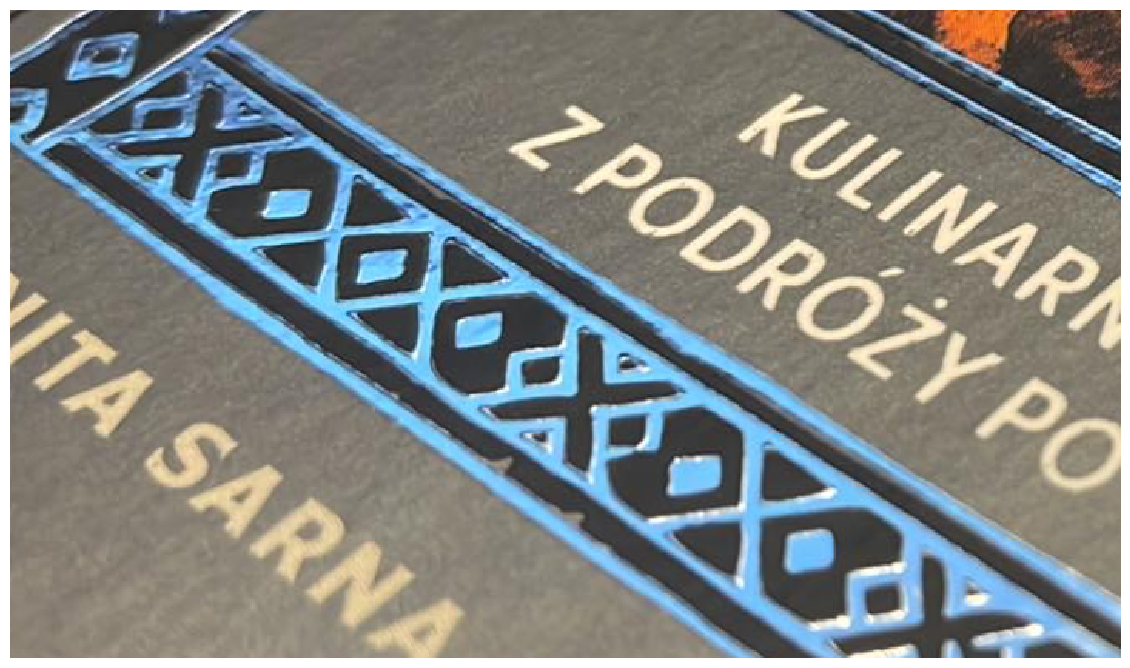

In [165]:
scaled_image = scale_image(image, 2)
img_width, img_height = scaled_image.shape[1], scaled_image.shape[0]
plt.figure(figsize=(img_width / 100, img_height / 100), dpi=100)
plt.imshow(scaled_image, aspect='equal', interpolation='none')
plt.axis('off')
plt.plot()
print(f'image type : {type(scaled_image)}')
print(f'most inner element type: {scaled_image.dtype}')
print(f'image shape: {scaled_image.shape}')
print(f'first element shape: {scaled_image[0, 0].shape}, [{type(scaled_image[0, 0, 0])}, {type(scaled_image[0, 0, 1])}, {type(scaled_image[0, 0, 2])}, {type(scaled_image[0, 0, 3])}]')
print(f'first element type: {type(scaled_image[0, 0])}')
print(f'first element contain: {(scaled_image[0, 0])}')

In [153]:
#print(scaled_image[0:5, 0:5, :])